## Regression: Predicting-the-Price-of-the-house-for-King-county Part 2

### Dataset Link

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

https://www.kaggle.com/mayanksrivastava/predict-housing-prices-simple-linear-regression/data

#### Features description:
#### The dataset consist of total 21 features price : The price of the house(This the Target variable which we have to predict)
- id : Unique value for each record
- date : when the property was bought/sold
- bedrooms : Number of bedroom in the house
- bathrooms : Number of bathroom in the house
- sqft_living : Living area
- sqft_lot : What is the lot size of the house
- floors : How many floor is in the house
- waterfront : Does it has any waterfront(0/1) 
- view : View the house has( which is zero and hence this variable does not contribute to the prediction
- condition : what is the condition of the house when the house was bought
- grade : The house are graded taking into consideration different parameter
- sqft_above : what is the area of the above portion of the house
- sqft_basement:what is the area of the basement
- yr_built : When the house was built
- yr_renovated: when the house was renovated
- zipcode : Zipcode
- lat : Latitude of the house it is located
- long : Longitude of the house it is located
- sqft_living15: Area of the living area if it has anymore in total
- sqft_lot15 : Area of the lot provided with the house 

### Objective:
* We use various regression methods and try to predict the house prices by using different features which contribute to the prediction of the house price.
* As we know we have different methods to get the solution but we need to find the best solution among the various method because each method has pros and cons. 
* Once after visualizing some features and a data mining process. we tried to find the best regression model for this dataset.


### Table of Contents:
1. [Data Pre-processing](#Data-Pre-processing)
    * [Importing Datasets](#Importing-Datasets)
    * [Exploring Data](#Exploring-Data)
    * [Merging Dataframes](#Merging-Dataframes)
    * [Data Cleaning](#Data-Cleaning)
    
    
2. [Correlation Matrix](#Correlation-Matrix)


3. [Regression](#Regression)
    * [Regression: Train-Test Split](#Regression:-Train-Test-Split)
    * [Regression: Feature Scaling](#Regression:-Feature-Scaling)
    * [Regression Models](#Regression:-Models)
        * [Bagging](#Bagging)
            * [Desision Tree Regressor with Bagging](#Desision-Tree-Regressor-with-Bagging)
            * [Linear Regression with Bagging](#Linear-Regression-with-Bagging)
        * [Pasting](#Pasting)
            * [KNN with Pasting](#KNN-with-Pasting)
            * [Linear Regression with Pasting](#Linear-Regression-with-Pasting)
        * [Adaboost](#Adaboost)
            * [Ridge with Adaboost](#Ridge-with-Adaboost)
            * [Lasso with Adaboost](#Lasso-with-Adaboost)
        * [Gradient Boosting Regressor](#Gradient-Boosting-Regressor)
        * [Boosting, Pasting and Bagging: Generating a Report table](#Boosting,-Pasting-and-Bagging:-Generating-a-Report-table)
        * [Principal Component Analysis](#Principal-Component-Analysis)
            * [KNN Regressor with PCA](#KNN-Regressor-with-PCA)
            * [Linear Regression](#Linear-Regression)
            * [Polynomial Regression with PCA](#Polynomial-Regression-with-PCA)
            * [Ridge Regression with PCA](#Ridge-Regression-with-PCA)
            * [Lasso Regression with PCA](#Lasso-Regression-with-PCA)
            * [SVM Regressor with PCA](#SVM-Regressor-with-PCA)
            * [SGD Regressor with PCA](#SGD-Regressor-with-PCA)
        * [Generating a Report table: PCA](#Generating-a-Report-table:-PCA)
        * [Neural Network Model](#Neural-Network-Model) 
        
        
4. [Model Selection](#Model-Selection)   
        


# Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
%matplotlib inline
import matplotlib.pyplot as plt
#import mglearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

In [2]:
housing_dataset = pd.read_csv('house_data.csv')

## Exploring Data

In [3]:
# We can see that for 'bedrooms	bathrooms	waterfront	view	yr_renovated' are having majority of the values as zero.
housing_dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
housing_dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
housing_dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Cleaning


### Changing the date format:

In [6]:
# Trimming the date column and replacing with the correct date format.
housing_dataset['date'] = housing_dataset['date'].str.replace('T000000',"")
housing_dataset['date'] = pd.to_datetime(housing_dataset['date'], format='%Y%m%d')

In [7]:
### Changed the date Format
housing_dataset.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


#### Findings from the dataset
* As we can see that the number of record having Zero in the view,waterfront, yr_renovated column.
* Respectively the counts are 19489,21450, 20699 out of 21613
* which do not seems to be the driving feature in predicting the price of the house.
* If we want we can drop this feature but we will keep as such.

In [8]:
print("Number of missing value in View column : " +str((housing_dataset['view']==0).sum()))
print("Number of missing value in waterfront column : " +str((housing_dataset['waterfront']==0).sum()))
print("Number of missing value in yr_renovated column : " +str((housing_dataset['yr_renovated']==0).sum()))

Number of missing value in View column : 19489
Number of missing value in waterfront column : 21450
Number of missing value in yr_renovated column : 20699



### Missing Values: 
* As we can see that the date column is not properly defined so we need to correct the date column of the dataset. Also we can see that the dataset containing lot of 0( Zero) which indicate that the data is missing for that column or dataset do not contain the correct value.
* when trying to check for missing value we came to see that no column has the missing value because the values are filled with zero(0) which is not termed as missing value.

### Handling the missing value

* Replacing the missing values from  view,waterfront, yr_renovated column with zero 

In [9]:
housing_dataset[['view','waterfront','yr_renovated']]= housing_dataset[['view','waterfront','yr_renovated']].replace(to_replace =[np.nan,' '], value =0) 

In [10]:
Missing_Values_Housing=(housing_dataset.isna().sum(axis=0))
Missing_Values_Housing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
#number of features and instances
housing_dataset.shape

(21613, 21)

### Age of the House and price comparision:

As we know that the age of the house also play the vital role in predicting the price of the house so we will create few more columns which will tell us how old is the house. For that we are Converting the yr_built to the diffrent bins which will reduce the effects of minor observation errors but it will increase the number of column.calculating the number of years the houses were built. We can observe this in the below histograms.

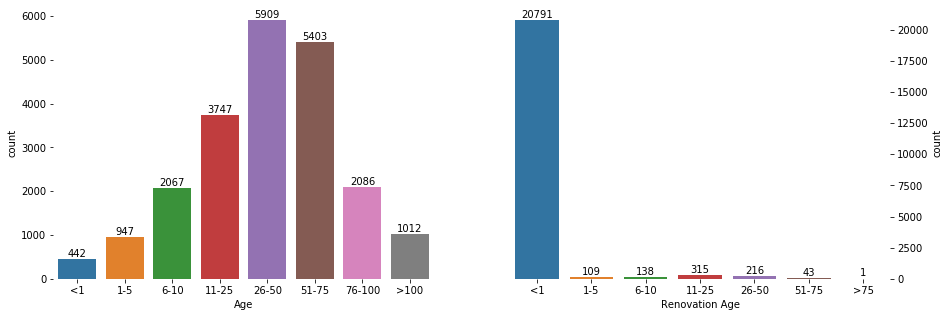

In [12]:
# just take the year from the date column
housing_dataset['sales_yr'] = housing_dataset['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
housing_dataset['age']=housing_dataset['sales_yr'].astype(int)-housing_dataset['yr_built']
# add the age of the renovation when the houses were sold as a new column
housing_dataset['age_rnv']=0
housing_dataset['age_rnv']=housing_dataset['sales_yr'][housing_dataset['yr_renovated']!=0].astype(int)-housing_dataset['yr_renovated'][housing_dataset['yr_renovated']!=0]
housing_dataset['age_rnv'][housing_dataset['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
housing_dataset['age_binned'] = pd.cut(housing_dataset['age'], bins=bins, labels=labels)

# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
housing_dataset['age_rnv_binned'] = pd.cut(housing_dataset['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(housing_dataset['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(housing_dataset['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

# transform the factor values to be able to use in the model
housing_dataset = pd.get_dummies(housing_dataset, columns=['age_binned','age_rnv_binned'])

In [13]:
housing_dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_yr', 'age',
       'age_rnv', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

In [14]:
# now after converting the age of the house in different categories our feature go increased to 39.
housing_dataset.shape

(21613, 39)

In [15]:
corr = housing_dataset.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

Here, we see some interesting correlations. Removing the some variables that are highly correlated (0.8 and more) with each other to avoid overfitting the models and to avoid multicollinearity.
So Creating the list of feature column required for the analysis and prediction into x_feature and y_feature,

In [16]:
# we are taking only the relevant feature which is relevant and constitue in the pice value of the house.
x_feature = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
y_feature= ['price']

In [17]:
X = housing_dataset[x_feature]
y = housing_dataset[y_feature]

# Regression

## Train-Test split:

In [18]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Scaling:
* MinMax scaling is used to avoid any feature to dominate the model. MinMax scaling scales all the data in the columns between 0 to 1.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Regression Models

## Bagging

## Desision Tree Regressor with Bagging

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#Base model
dt = DecisionTreeRegressor(random_state = 0)

#model param
grid_param = {'max_depth': [3, 5, 7, 9, 11, 15]}

#grid model
dt_grid = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1)

#train grid model
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
print("Best Parameters for Decision Tree: ", dt_grid.best_params_)

Best Parameters for Decision Tree:  {'max_depth': 11}


In [49]:
from sklearn.ensemble import BaggingRegressor

#base model
dt = DecisionTreeRegressor(max_depth = 11, random_state=0)
bag = BaggingRegressor(dt, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500, 1000],
              'max_samples': [0.1, 0.5, 1.0]}

#grid model
bag_dt_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                             max_depth=11,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fraction_leaf=0.0,
                                                             

In [50]:
print("Best Parameters for Decision Tree with Bagging: ", bag_dt_grid.best_params_)

Best Parameters for Decision Tree with Bagging:  {'max_samples': 0.5, 'n_estimators': 500}


In [51]:
bag = BaggingRegressor(dt, n_estimators=500, max_samples=0.5, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=11,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort=False,
                                                      random_state=0,
                                                      splitter='best'),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=0.5

In [52]:
print("Decision Tree with Bagging Training Score: ", bag.score(X_train, y_train))
print("Decision Tree with Bagging Testing Score: ", bag.score(X_test, y_test))

Decision Tree with Bagging Training Score:  0.9282882442016245
Decision Tree with Bagging Testing Score:  0.8798640151163686


In [53]:
report_table_1 = ['Decision Tree with Bagging', 'max_depth = 11, max_samples = 0.5, n_estimators = 500', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

## Linear Regression with Bagging

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

bag = BaggingRegressor(lr, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500],
              'max_samples': [10]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_samples': [10], 'n_estimators': [100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,


In [55]:
print("Best Parameters for Linear Regression with Bagging: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Bagging:  {'max_samples': 10, 'n_estimators': 500}


In [56]:
bag = BaggingRegressor(lr, n_estimators=500, max_samples=10, n_jobs = -1, bootstrap=True, random_state=0, oob_score=True)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=10, n_estimators=500, n_jobs=-1, oob_score=True,
                 random_state=0, verbose=0, warm_start=False)

In [57]:
print("Linear Regression with Bagging Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Bagging Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Bagging Training Score:  0.5327092463028711
Linear Regression with Bagging Testing Score:  0.5294824310137412


In [58]:
report_table_2 = ['Linear Regression with Bagging', 'max_samples = 10, n_estimators = 500', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

# Pasting

## KNN with Pasting

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

knn_param ={'n_neighbors': [3,5,7,11,15]}
knn_grid = GridSearchCV(knn, knn_param,cv = 5, n_jobs= -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
print("Best Parameters for KNN: ", knn_grid.best_params_)

Best Parameters for KNN:  {'n_neighbors': 3}


In [61]:
knn = KNeighborsRegressor(n_neighbors=3)
bag = BaggingRegressor(knn, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [500],
              'max_samples': [100]}

#grid model
bag_knn_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=3,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                         

In [62]:
print("Best Parameters for KNN with Pasting: ", bag_knn_grid.best_params_)

Best Parameters for KNN with Pasting:  {'max_samples': 100, 'n_estimators': 500}


In [63]:
bag = BaggingRegressor(knn, n_estimators=500, max_samples=100, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                    leaf_size=30,
                                                    metric='minkowski',
                                                    metric_params=None,
                                                    n_jobs=None, n_neighbors=3,
                                                    p=2, weights='uniform'),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [64]:
print("KNN with Pasting Training Score: ", bag.score(X_train, y_train))
print("KNN with Pasting Testing Score: ", bag.score(X_test, y_test))

KNN with Pasting Training Score:  0.38615327462297255
KNN with Pasting Testing Score:  0.3846847753483287


In [65]:
report_table_3 = ['KNN with Pasting', 'max_samples = 100, n_estimators = 500', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

## Linear Regression with Pasting

In [66]:
lr = LinearRegression()

bag = BaggingRegressor(lr, bootstrap=False, random_state = 0)
#model param
grid_param = {'n_estimators': [100, 500],
              'max_samples': [10]}

#grid model
bag_lr_grid = GridSearchCV(bag, grid_param, cv = 5, n_jobs = -1, return_train_score= True)

#train grid model
bag_lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=False,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_samples': [10], 'n_estimators': [100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,

In [67]:
print("Best Parameters for Linear Regression with Pasting: ", bag_lr_grid.best_params_)

Best Parameters for Linear Regression with Pasting:  {'max_samples': 10, 'n_estimators': 500}


In [68]:
bag = BaggingRegressor(lr, n_estimators=500, max_samples=10, n_jobs = -1, bootstrap=False, random_state=0)
bag.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=10, n_estimators=500, n_jobs=-1, oob_score=False,
                 random_state=0, verbose=0, warm_start=False)

In [69]:
print("Linear Regression with Pasting Training Score: ", bag.score(X_train, y_train))
print("Linear Regression with Pasting Testing Score: ", bag.score(X_test, y_test))

Linear Regression with Pasting Training Score:  0.5327092463028711
Linear Regression with Pasting Testing Score:  0.5294824310137412


In [70]:
report_table_4 =  ['Linear Regression with Pasting', 'max_samples = 10, n_estimators = 500', bag.score(X_train, y_train),
                                bag.score(X_test, y_test)]

# Adaboost 

## Ridge with Adaboost

In [71]:
from sklearn.linear_model import Ridge

ridge = Ridge()
grid_param = {'alpha' : [0.001, 0.01, 0.1, 1]}

ridge_ada_grid = GridSearchCV(ridge, grid_param, cv= 5)
ridge_ada_grid. fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [72]:
print("Best Parameters for Ridge with Adaboost: ", ridge_ada_grid.best_params_)

Best Parameters for Ridge with Adaboost:  {'alpha': 1}


In [73]:
from sklearn.ensemble import AdaBoostRegressor
ridge = Ridge(alpha = 1)

ada = AdaBoostRegressor(ridge)

param = {'n_estimators' : [100,500,1000],
             'learning_rate': [0.1, 0.5, 1, 10]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=Ridge(alpha=1,
                                                              copy_X=True,
                                                              fit_intercept=True,
                                                              max_iter=None,
                                                              normalize=False,
                                                              random_state=None,
                                                              solver='auto',
                                                              tol=0.001),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1, 10],
                         'n_estimators': [100, 500, 1000]},
             pre_dispa

In [74]:
print("Best Parameters for Adaboost: ", ada_grid.best_params_)

Best Parameters for Adaboost:  {'learning_rate': 0.5, 'n_estimators': 1000}


In [75]:
ada = AdaBoostRegressor(ridge, n_estimators=100, learning_rate=0.5, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
                  learning_rate=0.5, loss='linear', n_estimators=100,
                  random_state=0)

In [76]:
print("Ridge with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Ridge with Adaboost Testing Score: ", ada.score(X_test, y_test))

Ridge with Adaboost Training Score:  0.4662901412527404
Ridge with Adaboost Testing Score:  0.4704687126902715


In [77]:
report_table_5 = ['Ridge with Adaboost', 'alpha = 1, learning_rate=0.5, n_estimators = 500', ada.score(X_train, y_train),
                                ada.score(X_test, y_test)]

## Lasso with Adaboost 

In [80]:

from sklearn.linear_model import Lasso
lasso = Lasso()
param = {'alpha' : [0.001, 0.01, 0.1,0,1],
               'max_iter': [500, 1000]}

lasso_ada_grid = GridSearchCV(lasso, param, cv= 5)
lasso_ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1],
                         'max_iter': [500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
print("Best Parameters for Lasso with Adaboost: ", lasso_ada_grid.best_params_)

Best Parameters for Lasso with Adaboost:  {'alpha': 1, 'max_iter': 500}


In [83]:
lasso = Lasso(alpha=1, max_iter=500)

ada = AdaBoostRegressor(lasso)

param = {'n_estimators' : [100,500],
             'learning_rate': [0.1, 0.5]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostRegressor(base_estimator=Lasso(alpha=1,
                                                              copy_X=True,
                                                              fit_intercept=True,
                                                              max_iter=500,
                                                              normalize=False,
                                                              positive=False,
                                                              precompute=False,
                                                              random_state=None,
                                                              selection='cyclic',
                                                              tol=0.0001,
                                                              warm_start=False),
                                         learning_rate=1.0, loss='linear',
              

In [84]:
print("Best Parameters for Adaboost: ", ada_grid.best_params_)

Best Parameters for Adaboost:  {'learning_rate': 0.1, 'n_estimators': 100}


In [85]:
ada = AdaBoostRegressor(lasso, n_estimators=100, learning_rate=0.1, random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                                       max_iter=500, normalize=False,
                                       positive=False, precompute=False,
                                       random_state=None, selection='cyclic',
                                       tol=0.0001, warm_start=False),
                  learning_rate=0.1, loss='linear', n_estimators=100,
                  random_state=0)

In [86]:
print("Lasso with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Lasso with Adaboost Testing Score: ", ada.score(X_test, y_test))

Lasso with Adaboost Training Score:  0.4786688047038018
Lasso with Adaboost Testing Score:  0.4799092612095043


In [87]:
report_table_6 =  ['Lasso with Adaboost', 'alpha = 0.1, max_iter=500, learning_rate=0.1, n_estimators = 100',
                                ada.score(X_train, y_train), ada.score(X_test, y_test)]

# Gradient Boosting Regressor

In [88]:
from  sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=0)

param = {'max_depth': [4,5],
           'n_estimators': [5,10],
           'learning_rate': [ 0.5, 1.0]}
gb_grid = GridSearchCV(gb, param, cv = 5, return_train_score= True)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [89]:
print("Best Parameters for Gradient Boosting Regressor: ", gb_grid.best_params_)

Best Parameters for Gradient Boosting Regressor:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 10}


In [90]:
gb = GradientBoostingRegressor(max_depth=5, n_estimators=10, learning_rate=0.5, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.5, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [91]:
print("Gradient Boosting Training Score: ", gb.score(X_train, y_train))
print("Gradient Boosting Testing Score: ", gb.score(X_test, y_test))

Gradient Boosting Training Score:  0.914688143700165
Gradient Boosting Testing Score:  0.866955360807022


In [92]:
report_table_7 =  ['Gradient Boosting Regressor', 'learning_rate: 0.1, max_depth: 5, n_estimators: 10',
                                gb.score(X_train, y_train), gb.score(X_test, y_test)]

## Boosting, Pasting and Bagging: Generating a Report table
For comparing all the models, we will create a table and a plot.

In [93]:
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3,
             report_table_4,
             report_table_5,
             report_table_6,
             report_table_7))).transpose()

In [94]:
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
report_table.index = report_table['Model Name']
report_table.head(10)

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
Decision Tree with Bagging,Decision Tree with Bagging,"max_depth = 11, max_samples = 0.5, n_estimator...",0.928288,0.879864
Linear Regression with Bagging,Linear Regression with Bagging,"max_samples = 10, n_estimators = 500",0.532709,0.529482
KNN with Pasting,KNN with Pasting,"max_samples = 100, n_estimators = 500",0.386153,0.384685
Linear Regression with Pasting,Linear Regression with Pasting,"max_samples = 10, n_estimators = 500",0.532709,0.529482
Ridge with Adaboost,Ridge with Adaboost,"alpha = 1, learning_rate=0.5, n_estimators = 500",0.46629,0.470469
Lasso with Adaboost,Lasso with Adaboost,"alpha = 0.1, max_iter=500, learning_rate=0.1, ...",0.478669,0.479909
Gradient Boosting Regressor,Gradient Boosting Regressor,"learning_rate: 0.1, max_depth: 5, n_estimators...",0.914688,0.866955


In [96]:
report_table[['Training Score','Testing Score']]

,Training Score,Testing Score
Model Name,,
Decision Tree with Bagging,0.928288,0.879864
Linear Regression with Bagging,0.532709,0.529482
KNN with Pasting,0.386153,0.384685
Linear Regression with Pasting,0.532709,0.529482
Ridge with Adaboost,0.46629,0.470469
Lasso with Adaboost,0.478669,0.479909
Gradient Boosting Regressor,0.914688,0.866955


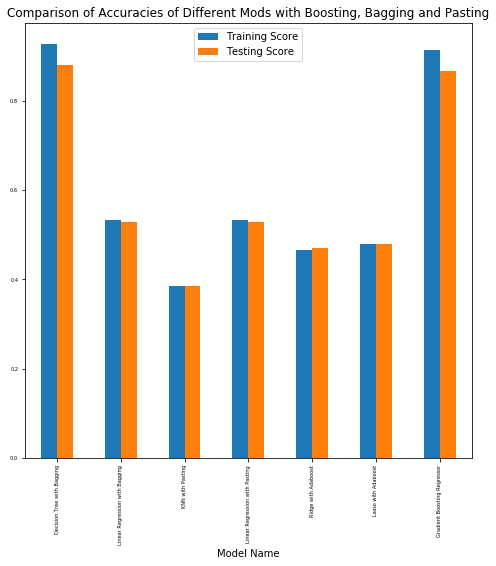

In [97]:
import matplotlib.pyplot as plt

ax = report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods with Boosting, Bagging and Pasting", figsize=(8, 8), fontsize = 5)
plt.show()

Decision Tree with Bagging seems to be the best model amongst the others.

# Principal Component Analysis

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [99]:
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  14


## KNN Regressor with PCA

In [100]:
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[3,4,5,6,7,8,9,10,15]}

knn = KNeighborsRegressor()

grid_knn_reg = GridSearchCV(knn, params, cv=5)
grid_knn_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [101]:
print("Best Parameters for KNN Regressor with PCA: ", grid_knn_reg.best_params_)

Best Parameters for KNN Regressor with PCA:  {'n_neighbors': 6}


In [102]:
pca_knn = KNeighborsRegressor(n_neighbors=6)
pca_knn.fit(X_train_reduced, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [103]:
print("KNN Regressor with PCA Training Score: ", pca_knn.score(X_train_reduced, y_train))
print("KNN Regressor with PCA Testing Score: ", pca_knn.score(X_test_reduced, y_test))

KNN Regressor with PCA Training Score:  0.8054659292773038
KNN Regressor with PCA Testing Score:  0.7196124021037115


In [104]:
pca_report_table_1 = ['KNN Regressor with PCA', 'n_neighbors = 6', pca_knn.score(X_train_reduced, y_train), pca_knn.score(X_test_reduced, y_test)]

## Linear Regression with PCA

In [105]:
from sklearn.linear_model import LinearRegression

pca_lr = LinearRegression()
pca_lr.fit(X_train_reduced, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
print("Linear Regression with PCA Training Score: ", pca_lr.score(X_train_reduced, y_train))
print("Linear Regression with PCA Testing Score: ", pca_lr.score(X_test_reduced, y_test))

Linear Regression with PCA Training Score:  0.648372880376151
Linear Regression with PCA Testing Score:  0.6324022111712448


In [109]:
pca_report_table_2 = ['Linear Regression with PCA', 'Simple', pca_lr.score(X_train_reduced, y_train), pca_lr.score(X_test_reduced, y_test)]

   ## Polynomial Regression with PCA
    

In [111]:
from  sklearn.preprocessing  import PolynomialFeatures

lr = LinearRegression()
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)
lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
print("Polynomial Regression with PCA Training Score: ", lr.score(X_train_poly, y_train))
print("Polynomial Regression with PCA Testing Score: ", lr.score(X_test_poly, y_test))

Polynomial Regression with PCA Training Score:  0.87921730832997
Polynomial Regression with PCA Testing Score:  0.33276998362781274


In [113]:
pca_report_table_3 =  ['Polynomial Regression with PCA', 'Degree = 3', lr.score(X_train_poly, y_train), lr.score(X_test_poly, y_test)]

## Ridge Regression with PCA

In [114]:
pca_ridge = Ridge()
params = {'alpha' : [0.001, 0.01, 0.1,0,1]}

ridge_pca_grid = GridSearchCV(pca_ridge, params, cv= 5)
ridge_pca_grid. fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [115]:
print("Best Parameters for Ridge Regression: ", ridge_pca_grid.best_params_)

Best Parameters for Ridge Regression:  {'alpha': 1}


In [116]:
pca_ridge = Ridge(alpha = 1)
pca_ridge.fit(X_train_reduced, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [117]:
print("Ridge Regression Training Score: ", pca_ridge.score(X_train_reduced, y_train))
print("Ridge Regression Testing Score: ", pca_ridge.score(X_test_reduced, y_test))

Ridge Regression Training Score:  0.6483710239004188
Ridge Regression Testing Score:  0.6324044099565471


In [118]:
pca_report_table_4 = ['Ridge Regression with PCA', 'alpha = 1', pca_ridge.score(X_train_reduced, y_train), pca_ridge.score(X_test_reduced, y_test)]

## Lasso Regression with PCA

In [119]:
pca_lasso = Lasso()
params = {'alpha' : [0.001, 0.01, 0.1,1],
         'max_iter': [500, 1000, 5000, 10000]}

lasso_pca_grid = GridSearchCV(pca_lasso, params, cv= 5)
lasso_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'max_iter': [500, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [120]:
print("Best Parameters for Lasso Regression: ", lasso_pca_grid.best_params_)

Best Parameters for Lasso Regression:  {'alpha': 1, 'max_iter': 500}


In [121]:
pca_lasso = Ridge(alpha = 1, max_iter = 500)
pca_lasso.fit(X_train_reduced, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [122]:
print("Lasso Regression Training Score: ", pca_lasso.score(X_train_reduced, y_train))
print("Lasso Regression Testing Score: ", pca_lasso.score(X_test_reduced, y_test))

Lasso Regression Training Score:  0.6483710239004188
Lasso Regression Testing Score:  0.6324044099565471


In [123]:
pca_report_table_5 = ['Lasso Regression with PCA', 'alpha = 1, max_iter = 500', pca_lasso.score(X_train_reduced, y_train), pca_lasso.score(X_test_reduced, y_test)]

## SVM Regressor with PCA

In [124]:
from sklearn import svm

params = {'kernel': ('linear', 'rbf', 'poly'), 'gamma': [0.1, 1],'epsilon':[0.1,0.5], 'C':[10, 100]}
pca_svr = svm.SVR()
svr_pca_grid = GridSearchCV(pca_svr, params)
svr_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [10, 100], 'epsilon': [0.1, 0.5],
                         'gamma': [0.1, 1],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
print("Best Parameters for SVM Regressor: ", svr_pca_grid.best_params_)

Best Parameters for SVM Regressor:  {'C': 100, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [126]:
pca_svr = svm.SVR(C = 100, epsilon= 0.1, gamma= 0.1, kernel = 'linear')
pca_svr.fit(X_train_reduced, y_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [127]:
print("SVR Regression Training Score: ", pca_svr.score(X_train_reduced, y_train))
print("SVR Regression Testing Score: ", pca_svr.score(X_test_reduced, y_test))

SVR Regression Training Score:  0.1454614333079396
SVR Regression Testing Score:  0.15018391524898755


In [128]:
pca_report_table_6 = ['SVM Regression with PCA', 'C = 100, epsilon = 0.1, gamma = 0.1, kernel =linear', pca_svr.score(X_train_reduced, y_train), pca_svr.score(X_test_reduced, y_test)]

## SGD Regressor with PCA

In [129]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state= 0)

params = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1'],
    'learning_rate': ['constant', 'optimal'],
}

sgd_pca_grid = GridSearchCV(sgd, params)
sgd_pca_grid.fit(X_train_reduced, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=0, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'learning_rate': ['constant', 'optimal'],
                         'loss': ['squared_loss', 'huber'],
                         'penalty': ['l2', 'l

In [130]:
print("Best Parameters for SGD Regressor: ", sgd_pca_grid.best_params_)

Best Parameters for SGD Regressor:  {'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'squared_loss', 'penalty': 'l1'}


In [131]:
pca_sgd = SGDRegressor(alpha = 0.01, learning_rate = 'optimal', loss = 'squared_loss', penalty = 'l1')
pca_sgd.fit(X_train_reduced, y_train)

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='optimal', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [132]:
print("SGD Regression Training Score: ", pca_sgd.score(X_train_reduced, y_train))
print("SGD Regression Testing Score: ", pca_sgd.score(X_test_reduced, y_test))

SGD Regression Training Score:  0.6483439324772349
SGD Regression Testing Score:  0.6322661602282236


In [133]:
pca_report_table_7 = ['SGD Regression with PCA', 'alpha = 0.01, learning_rate = optimal, loss = sqaured_loss, penalty = l1', pca_sgd.score(X_train_reduced, y_train), pca_sgd.score(X_test_reduced, y_test)]

## Generating a Report table: PCA
For comparing all the models, we will create a table and a plot.

In [134]:
pca_report_table = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3,
             pca_report_table_4,
             pca_report_table_5,
             pca_report_table_6,
             pca_report_table_7))).transpose()

In [135]:
pca_report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score']
pca_report_table.index = pca_report_table['Model Name']

In [136]:
pca_report_table

,Model Name,Model Parameter,Training Score,Testing Score
Model Name,,,,
KNN Regressor with PCA,KNN Regressor with PCA,n_neighbors = 6,0.805466,0.719612
Linear Regression with PCA,Linear Regression with PCA,Simple,0.648373,0.632402
Polynomial Regression with PCA,Polynomial Regression with PCA,Degree = 3,0.879217,0.33277
Ridge Regression with PCA,Ridge Regression with PCA,alpha = 1,0.648371,0.632404
Lasso Regression with PCA,Lasso Regression with PCA,"alpha = 1, max_iter = 500",0.648371,0.632404
SVM Regression with PCA,SVM Regression with PCA,"C = 100, epsilon = 0.1, gamma = 0.1, kernel =l...",0.145461,0.150184
SGD Regression with PCA,SGD Regression with PCA,"alpha = 0.01, learning_rate = optimal, loss = ...",0.648344,0.632266


In [137]:
report_table_without_pca = pd.read_csv('result-house_price.csv', index_col = 'Model name')

report_table_without_pca

,Best Parameters,Train Score,Test Score,Best Cross-Validation score
Model name,,,,
Linear Regression,NaN,0.71,0.69,0.702167
Ridge Regression,{'alpha': 1},0.71,0.69,0.699784
Lasso Regression,{'alpha': 10},0.71,0.69,0.701146
Kneighbours Regression,{'n_neighbors': 12},0.59,0.49,0.509401
LinearSVC,{'C': 10000},0.63,0.62,0.630847
SVC(kernel = rbf),{'C': 10000 'gamma': 0.1},0.55,0.54,0.531739
SVC(kernel = poly),{'C': 100 'degree': 2 'gamma': 100},0.82,0.79,0.806626


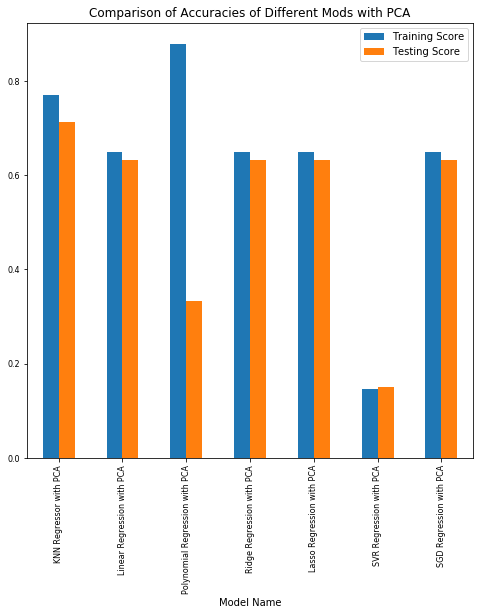

In [178]:
import matplotlib.pyplot as plt

ax = pca_report_table[['Training Score','Testing Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods with PCA", figsize=(8, 8), fontsize = 8)
plt.show()

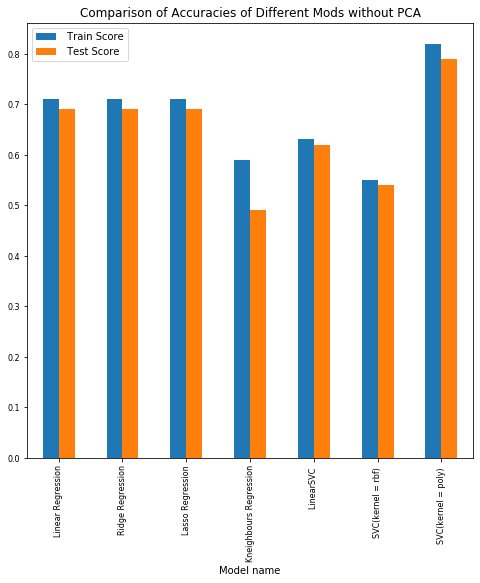

In [138]:
import matplotlib.pyplot as plt

ax = report_table_without_pca[[' Train Score',' Test Score']].plot(kind='bar',
            title = "Comparison of Accuracies of Different Mods without PCA", figsize=(8, 8), fontsize = 8)
plt.show()


Applying PCA does not improve the results for out dataset. 

SVC(Kernel = poly)  without PCA seems to be the best model amongst the others here.


# Neural Network Mode

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV


Using TensorFlow backend.


In [40]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
np.random.seed(0)

model = Sequential()
model.add(Dense(128, input_dim = 31, activation = 'relu'))

model.add(Dropout(0.25))

#The model was overfitting by using other parameters, so we have to use dropout layers in between. 

model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.15))

model.add(Dense(1, activation = 'linear'))

# the output layer is using linear activation function, since we are predictng continuous output.

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse'])

# after 50 epochs the loss value  started increasing, so we have used 50 epochs.

model.fit(X_train, y_train, epochs = 50, batch_size = 70)

Epoch 1/50
16209/16209 [==============================] - 1s 74us/step - loss: 428264829374.0140 - mean_squared_error: 428264829374.0140
Epoch 2/50
16209/16209 [==============================] - 1s 35us/step - loss: 417183733367.4319 - mean_squared_error: 417183733367.4319
Epoch 3/50
16209/16209 [==============================] - 1s 34us/step - loss: 378545491128.7863 - mean_squared_error: 378545491128.7863
Epoch 4/50
16209/16209 [==============================] - 1s 34us/step - loss: 308870343535.7720 - mean_squared_error: 308870343535.7720
Epoch 5/50
16209/16209 [==============================] - 1s 34us/step - loss: 225296849792.1974 - mean_squared_error: 225296849792.1974
Epoch 6/50
16209/16209 [==============================] - 1s 34us/step - loss: 157476539057.2368 - mean_squared_error: 157476539057.2368
Epoch 7/50
16209/16209 [==============================] - 1s 35us/step - loss: 122230022971.0842 - mean_squared_error: 122230022971.0842
Epoch 8/50
16209/16209 [=================

In [41]:
model.evaluate(X_train, y_train)

16209/16209 [==============================] - 1s 31us/step


[50190249779.31371, 50190249779.31371]

In [42]:
model.evaluate(X_test, y_test)

5404/5404 [==============================] - 0s 20us/step


[52164839504.34345, 52164839504.34345]

In [43]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("NN Train Score: ",r2_score(y_train, y_train_pred))
print("NN Test Score: ", r2_score(y_test, y_test_pred))

NN Train Score:  0.6293471022367048
NN Test Score:  0.607312489002794


BY using the above parameter, the train and test score are close and the model is not overfitting


# Model Selection

After running all the model and comparing using the barchart with the train and test score. 
We analysed amongst all the models SVC(kernal=poly) seems to be the best model amongst the other models.
The train and test score are better than the other models in comparison with out overfitting.


Here SVC(Kernal = poly) is run with the best parameter from the project part 1.

In [139]:
from sklearn.svm import SVR
Poly_SVR=SVR(kernel = 'poly', C = 100, gamma = 100,degree=2)
Poly_SVR.fit(X_train,y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma=100,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [141]:
train_score_poly_Kernel=round(Poly_SVR.score(X_train, y_train),2)
test_score_poly_Kernel=round(Poly_SVR.score(X_test, y_test),2)

In [143]:
print("Train Score with best parameter:{}".format(train_score_poly_Kernel))
print("Test Score with best parameter:{}".format(test_score_poly_Kernel))

Train Score with best parameter:0.82
Test Score with best parameter:0.79


In [144]:
y_predicted = Poly_SVR.predict(X_test)

In [145]:
print("Predicted value for 5th testing row: ", y_predicted[4])
print("Original value for 5th testing row: ", y_test.values[4])

print("")


Predicted value for 5th testing row:  789845.4913623902
Original value for 5th testing row:  [780000.]

Predicted value for 1st testing row:  362104.2566774907
Original value for 1st testing row:  [410000.]


In [158]:
print("Predicted value for 1st testing row: ", y_predicted[20])
print("Original value for 1st testing row: ", y_test.values[20])

Predicted value for 1st testing row:  371041.15058536554
Original value for 1st testing row:  [375000.]


In [159]:
print("Predicted value for 1st testing row: ", y_predicted[25])
print("Original value for 1st testing row: ", y_test.values[25])

Predicted value for 1st testing row:  313191.9278404527
Original value for 1st testing row:  [280000.]


As we can see our model works pretty well on the test data as also.

Poly kernel with parameter of {'C': 100 'degree': 2 'gamma': 100} has the train and test score of 0.82 and 0.79 respectively


### Best Model: Poly kernel without PCA
* This model provides best result for the unseen data which we can see when checked with the actual value and predicted value where there not much difference which can be considered great when compared with the other model.
* This model also provides good train and test score hence Poly Kernel without PCA is choosen as the best model.